#  Chi-Square Test for Variance <hr style="border:2.5px solid #126782"></hr>

Data Analyst: Gyro A. Madrona<br>
Department: Electrical Engineering

In [1]:
# imports and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# load dataset
df = pd.read_csv(r"raw\electricity-normal-sample-cleaned.csv",
                 delimiter=',')
df

,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,1307,612,1939,1127,1076,126,52
1,1288,680,1724,1167,1233,173,57
2,1255,721,1961,1170,1193,178,56
3,1336,692,1715,1077,1138,112,54
4,1238,682,1859,1136,1126,188,55
5,1273,752,1920,1197,1105,137,57
6,1233,601,2048,1098,1102,172,56
7,1337,685,1935,1234,1099,223,53
8,1274,771,1896,1149,1182,173,57
9,1333,761,1944,1078,1207,189,54


In [4]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Nuclear        49 non-null     int64
 1   Wind           49 non-null     int64
 2   Hydroelectric  49 non-null     int64
 3   Oil and Gas    49 non-null     int64
 4   Coal           49 non-null     int64
 5   Solar          49 non-null     int64
 6   Biomass        49 non-null     int64
dtypes: int64(7)
memory usage: 2.8 KB


In [5]:
# summary of statistics
df.describe()

,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1267.408163,706.408163,1853.551020,1128.734694,1138.000000,168.367347,54.918367
std,34.762239,78.584593,113.120154,62.054672,39.800544,39.045216,2.069991
min,1197.000000,555.000000,1601.000000,1000.000000,1067.000000,95.000000,50.000000
25%,1242.000000,664.000000,1778.000000,1090.000000,1113.000000,139.000000,54.000000
50%,1268.000000,705.000000,1851.000000,1128.000000,1134.000000,169.000000,55.000000
75%,1293.000000,752.000000,1939.000000,1167.000000,1160.000000,193.000000,56.000000
max,1337.000000,922.000000,2063.000000,1297.000000,1233.000000,254.000000,59.000000


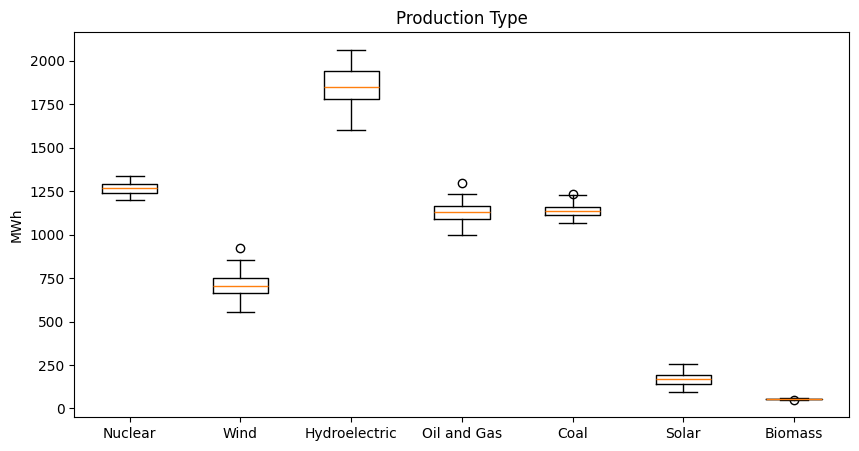

In [6]:
# boxplot
plt.figure(figsize=(10,5))
plt.boxplot(df[['Nuclear','Wind','Hydroelectric','Oil and Gas','Coal','Solar','Biomass']],
            tick_labels=df.columns)
plt.title('Production Type')
plt.ylabel('MWh')
#plt.xticks(rotation=45)
plt.show()

# Nuclear

In [7]:
# Hypothesis
# Ho: sigma_1 <= 32.50
# Ha: sigma_1 > 32.50

# test statistic
dof = df['Nuclear'].count() - 1
sample_var = df['Nuclear'].var(ddof=1)
pop_var = np.pow(32.50,2)

chi_sq_stat = dof*(sample_var/pop_var)
chi_sq_stat

np.float64(54.91487501509479)

In [8]:
# right-tailed test
p_value = 1 - stats.chi2.cdf(chi_sq_stat, dof)
p_value

np.float64(0.22911137843687335)

In [9]:
# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Unequal variances")
else:
    # fail to reject null hypothesis
    print("Equal variances")

Equal variances


# Wind

In [10]:
# Hypothesis
# Ho: sigma_1 >= 32.50
# Ha: sigma_1 < 88.28

# test statistic
dof = df['Wind'].count() - 1
sample_var = df['Wind'].var(ddof=1)
pop_var = np.pow(88.28,2)

chi_sq_stat = dof*(sample_var/pop_var)
chi_sq_stat

np.float64(38.03569931221101)

In [ ]:
# left-tailed test
p_value = stats.chi2.cdf(chi_sq_stat, dof)
p_value

np.float64(0.15198194686671987)

In [11]:
# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Unequal variances")
else:
    # fail to reject null hypothesis
    print("Equal variances")

Equal variances


# Hydroelectric

In [12]:
# Hypothesis
# Ho: sigma_1 = 96.24
# Ha: sigma_1 != 96.24

# test statistic
dof = df['Hydroelectric'].count() - 1
sample_var = df['Hydroelectric'].var(ddof=1)
pop_var = np.pow(96.24,2)

chi_sq_stat = dof*(sample_var/pop_var)
chi_sq_stat

np.float64(66.31472657553476)

In [13]:
# two-tailed test
p_value = 2*min(stats.chi2.cdf(chi_sq_stat, dof),
                1 - stats.chi2.cdf(chi_sq_stat, dof))
p_value

np.float64(0.08191670682675234)

In [14]:
# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Unequal variances")
else:
    # fail to reject null hypothesis
    print("Equal variances")

Equal variances
